<a href="https://colab.research.google.com/github/Belloy96/K-Digital-Training/blob/master/Jul31_2_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# data 폴더 안에 있는 birth.txt파일을 load하기
birth = np.loadtxt('data/births.txt', delimiter=',', dtype=np.int64)

In [2]:
print(birth.shape)
print(type(birth))

(132, 3)
<class 'numpy.ndarray'>


In [3]:
birth

# 결과 : 연도, 남자아이 수, 여자아이 수로 구성

array([[   1880,   90993,  110491],
       [   1881,   91954,  100745],
       [   1882,  107850,  113688],
       [   1883,  112321,  104629],
       [   1884,  129022,  114445],
       [   1885,  133055,  107800],
       [   1886,  144535,  110784],
       [   1887,  145982,  101414],
       [   1888,  178627,  120853],
       [   1889,  178366,  110584],
       [   1890,  190377,  111025],
       [   1891,  185482,  101196],
       [   1892,  212346,  122037],
       [   1893,  212906,  112317],
       [   1894,  222922,  115772],
       [   1895,  233630,  117398],
       [   1896,  237920,  119570],
       [   1897,  234202,  112758],
       [   1898,  258770,  122693],
       [   1899,  233023,  106212],
       [   1900,  299828,  150499],
       [   1901,  239348,  106471],
       [   1902,  264077,  122659],
       [   1903,  261973,  119234],
       [   1904,  275371,  128125],
       [   1905,  291629,  132319],
       [   1906,  295303,  133159],
       [   1907,  318566,  1

In [4]:
import matplotlib.pyplot as plt

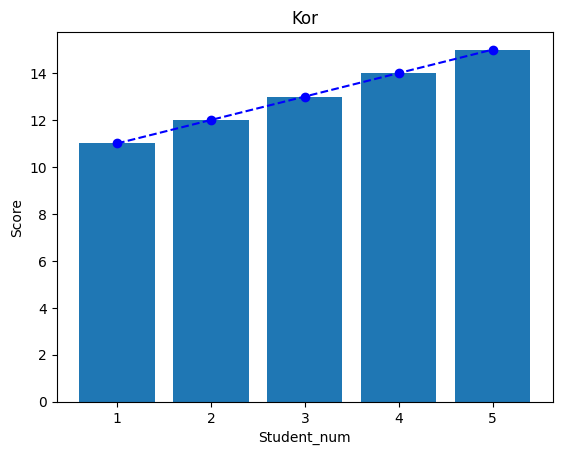

In [5]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([11, 12, 13, 14, 15])

plt.plot(a, b, 'bo--')
plt.bar(a, b)

plt.title('Kor')
plt.xlabel('Student_num')
plt.ylabel('Score')
plt.show()

In [142]:
# 1. 남자아이, 여자아이 출생 수 평균을 구해주세요 (정수로 출력)
a = np.mean(birth[:, 1], axis=0)
b = np.mean(birth[:, 2], axis=0)
print(int(a), int(b))

# 강사님 답안
print("남자아이 평균 : ",int(birth[:, 1].mean()))
print("여자아이 평균 : ",int(birth[:, 2].mean()))

1225776 1245399
남자아이 평균 :  1225776
여자아이 평균 :  1245399


In [144]:
# 2. 2000년부터의 데이터를 구해주세요 (2000 ~ 2011)
#   연도  남자    여자
#   2000  1234567 1234567
#   ...

for data in birth:
  if data[0] >= 2000:
    print(data)

# 강사님 답안
print("연도", "남자", "여자", sep="\t")
print("=" * 30)
for y, m, f in birth[birth[:, 0] >= 2000]:
  print(y, m, f, sep="\t")

[   2000 1814601 1962406]
[   2001 1799049 1941251]
[   2002 1795206 1939815]
[   2003 1825359 1973434]
[   2004 1834145 1982794]
[   2005 1845379 1994841]
[   2006 1898463 2052377]
[   2007 1919408 2072139]
[   2008 1887234 2036289]
[   2009 1832925 1979303]
[   2010 1772738 1913851]
[   2011 1753500 1893230]
연도	남자	여자
2000	1814601	1962406
2001	1799049	1941251
2002	1795206	1939815
2003	1825359	1973434
2004	1834145	1982794
2005	1845379	1994841
2006	1898463	2052377
2007	1919408	2072139
2008	1887234	2036289
2009	1832925	1979303
2010	1772738	1913851
2011	1753500	1893230


In [146]:
# 3. 남자아이 출생이 가장 많은 연도와 남자아이 출생 수를 구해주세요
np.argmax(birth[:, 1], axis=0)
print(birth[77])

# 강사님 답안
# argmax() : 가장 많은 값의 index를 반환
birth[birth[:, 1].argmax()]
y = birth[birth[:, 1].argmax()][0] # 연도
b = birth[birth[:, 1].argmax()][1] # 남자아이 출생 수

print("연도", "남자아이", sep="\t")
print(y, b, sep="\t")

[   1957 2044160 2155866]
연도	남자아이
1957	2044160


In [150]:
# 4. 여자아이 출생이 가장 많은 top5를 구해주세요 (연도, 여자아이 수)
np.argmax(birth[:, 2], axis=0)
print(birth[77])

# 강사님 답안
top5_girls = np.sort(birth[:, 2])[-1: -6: -1] #역순으로 찾을때는 인덱스에 -1
print(top5_girls)

print("연도", "여자아이 수", sep="\t")
print("=" * 20)
for i in birth:
  for j in top5_girls:
    if (i[2] == j):
      print(i[0], j, sep="\t")

[   1957 2044160 2155866]
[2155866 2133509 2132717 2122502 2120712]
연도	여자아이 수
1957	2155866
1958	2120712
1959	2133509
1960	2132717
1961	2122502


In [153]:
# 5. 여자아이 출생률(%)을 구하고, 각 연도별로 여자아이 출생수가 차지하는 비율을
#   데이터로 보여주세요. (소수점 둘째자리까지)
#   연도  남자    여자    여자출생률
#   1880  123123  100000  41.xx
for data in birth:
  sum = data[1] + data[2]
  per = (data[2] / sum) * 100
  # per = round(per, 2)
  # print(per)
  data = np.insert(data, 3, per)
  print(data)

# 강사님 답안
girls_ratio = ((birth[:, 2] / (birth[:, 1] + birth[:, 2])) * 100).round(2)
girls_ratio

print("연도", "남아", "여아", "여아 출생률", sep="\t")
print("=" * 40)
for y, b, g, gr in zip(birth[:, 0], birth[:, 1], birth[:, 2], girls_ratio):
  print(y, b, g, gr, sep="\t")

[  1880  90993 110491     54]
[  1881  91954 100745     52]
[  1882 107850 113688     51]
[  1883 112321 104629     48]
[  1884 129022 114445     47]
[  1885 133055 107800     44]
[  1886 144535 110784     43]
[  1887 145982 101414     40]
[  1888 178627 120853     40]
[  1889 178366 110584     38]
[  1890 190377 111025     36]
[  1891 185482 101196     35]
[  1892 212346 122037     36]
[  1893 212906 112317     34]
[  1894 222922 115772     34]
[  1895 233630 117398     33]
[  1896 237920 119570     33]
[  1897 234202 112758     32]
[  1898 258770 122693     32]
[  1899 233023 106212     31]
[  1900 299828 150499     33]
[  1901 239348 106471     30]
[  1902 264077 122659     31]
[  1903 261973 119234     31]
[  1904 275371 128125     31]
[  1905 291629 132319     31]
[  1906 295303 133159     31]
[  1907 318566 146833     31]
[  1908 334313 154344     31]
[  1909 347228 163999     32]
[  1910 396501 194218     32]
[  1911 418299 225968     35]
[  1912 558103 429945     43]
[  1913 62

In [158]:
# 6. 2000년 이후 데이터에 대해 출생량을 구하고,
#   남자아이 수가 1,800,000 이상이면 '많음', 아니면 '적음' 이라는 내용을 출력
for data in birth:
  if data[0] >= 2000:
    a = np.cumsum(data)
    print(a)
    np.where(a[1] >= 1800000, '많음', '적음')

# 강사님 답안
after_2000 = birth[birth[:, 0] >= 2000]
# print(after_2000)

boys = after_2000[:, 1]
# print(boys)

amount = np.where(boys >= 1800000, '많음', '적음')
# print(amount)

for y, b, amt in zip(after_2000[:, 0], boys, amount):
  print(y, b, amt)

[   2000 1816601 3779007]
[   2001 1801050 3742301]
[   2002 1797208 3737023]
[   2003 1827362 3800796]
[   2004 1836149 3818943]
[   2005 1847384 3842225]
[   2006 1900469 3952846]
[   2007 1921415 3993554]
[   2008 1889242 3925531]
[   2009 1834934 3814237]
[   2010 1774748 3688599]
[   2011 1755511 3648741]
2000 1814601 많음
2001 1799049 적음
2002 1795206 적음
2003 1825359 많음
2004 1834145 많음
2005 1845379 많음
2006 1898463 많음
2007 1919408 많음
2008 1887234 많음
2009 1832925 많음
2010 1772738 적음
2011 1753500 적음


In [163]:
# 7. 1800년대, 1900년대, 2000년대의 각 남자아이, 여자아이 출생수의 평균을 구해주세요
for data18 in birth:
  if data18[0] < 1900:
    print(data18)

print('---------------')

for data19 in birth:
  if data19[0] >= 1900 | data19[0] < 2000:
    print(data19)

print('---------------')

for data20 in birth:
  if data20[0] >= 2000:
    print(data20)

print('---------------')

# 강사님 답안
print("1800년대")
print("남아 평균", "여아 평균")                                   # 1번째 열부터 끝까지 = 1:
k_1800s = birth[ (birth[:, 0] >= 1800) & (birth[:, 0] < 1900) ][:, 1:]
# print(k_1800s)
print(k_1800s.mean(axis = 0)[0], k_1800s.mean(axis = 0)[1])

print("1900년대")
print("남아 평균", "여아 평균")
k_1900s = birth[ (birth[:, 0] >= 1900) & (birth[:, 0] < 2000) ][:, 1:]
print(k_1900s.mean(axis = 0)[0], k_1900s.mean(axis = 0)[1])

print("2000년대")
print("남아 평균", "여아 평균")
k_2000s = birth[ (birth[:, 0] >= 2000)][:, 1:]
print(k_2000s.mean(axis = 0)[0].round(2), k_2000s.mean(axis = 0)[1])



[  1880  90993 110491]
[  1881  91954 100745]
[  1882 107850 113688]
[  1883 112321 104629]
[  1884 129022 114445]
[  1885 133055 107800]
[  1886 144535 110784]
[  1887 145982 101414]
[  1888 178627 120853]
[  1889 178366 110584]
[  1890 190377 111025]
[  1891 185482 101196]
[  1892 212346 122037]
[  1893 212906 112317]
[  1894 222922 115772]
[  1895 233630 117398]
[  1896 237920 119570]
[  1897 234202 112758]
[  1898 258770 122693]
[  1899 233023 106212]
---------------
[  1900 299828 150499]
[  1901 239348 106471]
[  1902 264077 122659]
[  1903 261973 119234]
[   1916 1044323  890099]
[   1917 1081280  925511]
[   1918 1157647 1013537]
[   1919 1130145  980149]
---------------
[   2000 1814601 1962406]
[   2001 1799049 1941251]
[   2002 1795206 1939815]
[   2003 1825359 1973434]
[   2004 1834145 1982794]
[   2005 1845379 1994841]
[   2006 1898463 2052377]
[   2007 1919408 2072139]
[   2008 1887234 2036289]
[   2009 1832925 1979303]
[   2010 1772738 1913851]
[   2011 1753500 1893230]


In [165]:
# 8. 여자아이 출생수 25% ~ 75% 사이의 값을 구해주세요. (연도, 여자아이 출생 수)
# for data in birth:
#   if data[2] >= np.quantile(data[2], [0.25]) & data[2] <= np.quantile(data[2], [0.75]):
#     print(data[0], data[2])

# 강사님 답안
g_q25 = np.quantile(birth[:, 2], 0.25)
g_q75 = np.quantile(birth[:, 2], 0.75)
# print(g_q25, g_q75)
print(birth[ (birth[:, 2] >= g_q25) & (birth[:, 2] <= g_q75) ] [:, [0, 2]])

[[   1913  512557]
 [   1914  654762]
 [   1915  848603]
 [   1916  890099]
 [   1917  925511]
 [   1918 1013537]
 [   1919  980149]
 [   1920 1064463]
 [   1921 1101457]
 [   1922 1088287]
 [   1923 1096168]
 [   1924 1132751]
 [   1925 1115958]
 [   1926 1110505]
 [   1927 1126717]
 [   1928 1107518]
 [   1929 1075313]
 [   1930 1097176]
 [   1931 1039127]
 [   1932 1043808]
 [   1933  991127]
 [   1934 1032291]
 [   1935 1040930]
 [   1936 1036974]
 [   1937 1066309]
 [   1938 1108841]
 [   1939 1106544]
 [   1940 1158900]
 [   1941 1227941]
 [   1942 1380774]
 [   1943 1426846]
 [   1944 1362555]
 [   1945 1345610]
 [   1946 1623650]
 [   1947 1829223]
 [   1948 1754469]
 [   1949 1773725]
 [   1950 1790673]
 [   1951 1881080]
 [   1965 1861378]
 [   1966 1783964]
 [   1967 1744527]
 [   1968 1738928]
 [   1969 1789732]
 [   1970 1859594]
 [   1971 1769201]
 [   1972 1622666]
 [   1973 1559338]
 [   1974 1573105]
 [   1975 1562207]
 [   1976 1569904]
 [   1977 1643684]
 [   1978 16

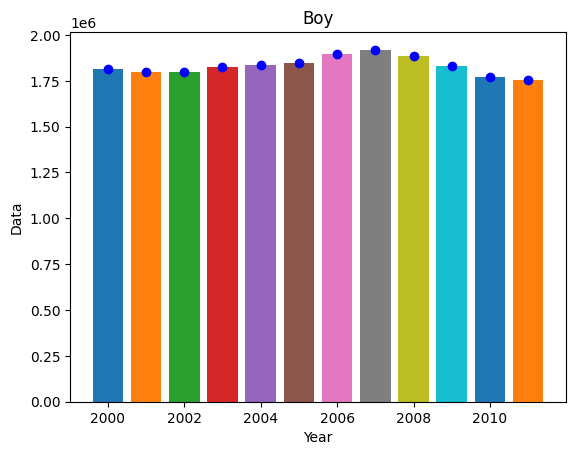

[[   2000 1814601]
 [   2001 1799049]
 [   2002 1795206]
 [   2003 1825359]
 [   2004 1834145]
 [   2005 1845379]
 [   2006 1898463]
 [   2007 1919408]
 [   2008 1887234]
 [   2009 1832925]
 [   2010 1772738]
 [   2011 1753500]]


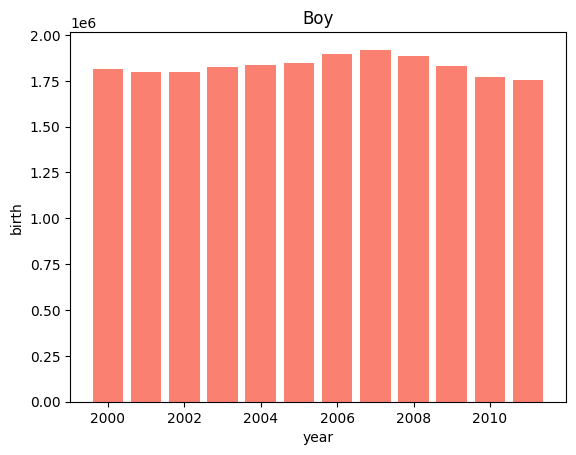

In [167]:
# 9. 2000년대 남자아이 데이터를 bar 차트로 나타내주세요
for data in birth:
  if data[0] >= 2000:
    a = data[0]
    b = data[1]
    plt.plot(a, b, 'bo--')
    plt.bar(a, b)
    plt.title('Boy')
    plt.xlabel('Year')
    plt.ylabel('Data')
plt.show()

# 강사님 답안
b_2000s = birth[birth[:, 0] >= 2000][:, 0:2]
print(b_2000s)
plt.bar(b_2000s[:, 0], b_2000s[:, 1], color="salmon")
plt.title('Boy')
plt.xlabel('year')
plt.ylabel('birth')
plt.show()